# Projeto de Análise de Redes

# Explicando Dataset

## O que é
O dataset é uma rede de usuários da LastFM, uma rede social com foco em música. Foi obtido em [https://snap.stanford.edu/data/feather-lastfm-social.html](https://snap.stanford.edu/data/feather-lastfm-social.html) e é composto por 7624 nós e 27806 arestas.


## O que são os nós e arestas
Os nós são os usuários da rede e as arestas são as conexões entre eles. As conexões são feitas quando um usuário adiciona outro como amigo, de forma mútua. Ou seja, se o usuário A adiciona o usuário B como amigo, o usuário B também adiciona o usuário A como amigo.

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importar grafo
grafo = pd.read_csv('lastfm_asia_edges.csv')
G = nx.Graph()
G = nx.from_pandas_edgelist(grafo, create_using=nx.Graph())
# Quantidade de nós e arestas
print('Quantidade de nós: ', G.number_of_nodes())
print('Quantidade de arestas: ', G.number_of_edges())

Quantidade de nós:  7624
Quantidade de arestas:  27806


In [ ]:
# Matriz de adjacência
matriz_adj = nx.adjacency_matrix(G)
adj_coo = matriz_adj.tocoo()
plt.figure(figsize=(15,15))
plt.spy(matriz_adj, markersize=0.1)
plt.show()

# Diâmetro e periferia da rede
print('Diâmetro da rede: ', nx.diameter(G))
print('Periferia da rede: ', nx.periphery(G))

In [8]:
# Espersidade e densidade da rede
print('Espersidade da rede: ', nx.density(G))
print('Densidade da rede: ', nx.density(G))

# Assosritivdade geral da rede
print('Assosritivdade geral da rede: ', nx.degree_assortativity_coefficient(G))

Espersidade da rede:  0.0009568849118596328
Densidade da rede:  0.0009568849118596328
Assosritivdade geral da rede:  0.01707317256063152


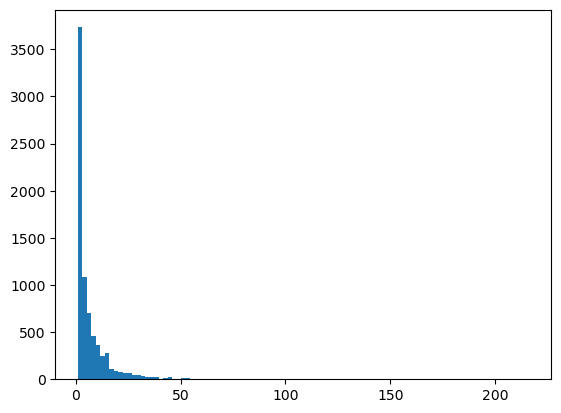

In [10]:
# Visualização do Hisograma de distribuição impírica de grau
graus = [G.degree(n) for n in G.nodes()]
plt.hist(graus, bins=100)
plt.show()

In [4]:
#

# Coeficiente de clustering global
print('Coeficiente de clustering global: ', nx.average_clustering(G))

Coeficiente de clustering global:  0.2194184243270858


In [2]:
# Calculando valores de Eigenvector centrality, Degree centrality, Closeness centrality e Betweenness centrality
eigenvector = nx.eigenvector_centrality(G)
degree = nx.degree_centrality(G)
closeness = nx.closeness_centrality(G)
betweenness = nx.betweenness_centrality(G)
print('Eigenvector centrality: ', eigenvector)
print('Degree centrality: ', degree)
print('Closeness centrality: ', closeness)
print('Betweenness centrality: ', betweenness)

Eigenvector centrality:  {0: 1.5975689365706297e-06, 747: 6.154499979108227e-05, 1: 0.00013107597395546663, 4257: 4.413415137221785e-05, 2194: 0.0004217279421980089, 580: 3.3969806762461453e-06, 6478: 0.003749366048862973, 1222: 2.407378366362153e-05, 5735: 1.3354388317919195e-05, 7146: 6.240855048742624e-06, 2204: 0.0007797133732390964, 126: 6.646983440719199e-06, 2639: 9.611874657386849e-06, 2: 7.43361375373027e-07, 562: 6.008655110851645e-07, 1492: 9.638772997819502e-07, 6: 1.4681164221796181e-05, 5303: 2.355214483227843e-06, 7128: 7.456872585822179e-06, 4154: 2.3757078010463456e-06, 5179: 1.9640827870533338e-07, 3: 0.00031615295836075907, 1728: 4.12792689210666e-05, 4560: 0.0001472646055852156, 5060: 0.0007591374078291235, 1351: 6.264257280200665e-05, 6503: 8.060182758684208e-05, 7089: 0.0002401321912110204, 4319: 0.0008150739973819275, 6095: 0.0005977957803895684, 272: 9.17161990448441e-06, 4433: 0.0002079028605082835, 2900: 1.180396189703248e-05, 3381: 0.004412449999293955, 5943:

In [3]:
# Valores de Eigenvector centrality, Degree centrality, Closeness centrality e Betweenness centrality para a rede
eigenvector_medio = np.mean(list(eigenvector.values()))
degree_medio = np.mean(list(degree.values()))
closeness_medio = np.mean(list(closeness.values()))
betweenness_medio = np.mean(list(betweenness.values()))
print('Eigenvector centrality médio: ', eigenvector_medio)
print('Degree centrality médio: ', degree_medio)
print('Closeness centrality médio: ', closeness_medio)
print('Betweenness centrality médio: ', betweenness_medio)

Eigenvector centrality médio:  0.0019623613571358393
Degree centrality médio:  0.0009568849118596328
Closeness centrality médio:  0.1943856661354511
Betweenness centrality médio:  0.0005552659759794935
